# 1. Carga de datos y librerias

In [442]:
# Librerías que se utilizarán para la tarea
!pip install plotly
!pip install jovian

    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import plotly.graph_objects as go
import plotly.offline as po
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import special
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
init_notebook_mode(connected=True)  
%matplotlib notebook

In [443]:
df = pd.read_csv('https://raw.githubusercontent.com/CamilaGutierrezR/BD-y-ML/main/gf_db_2017.csv',low_memory=False)
# Dejamos solo las variables que ocuparemos
df = df [['inclusion_financiera', 'mujer', 'edad', 'educ', 'quintil', 'economy', 'regionwb', 'gdp_percapita']]

# 2. Análisis descriptivo

In [444]:
# Descrpición de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151478 entries, 0 to 151477
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   inclusion_financiera  151478 non-null  int64  
 1   mujer                 151478 non-null  int64  
 2   edad                  151478 non-null  int64  
 3   educ                  151468 non-null  object 
 4   quintil               151478 non-null  int64  
 5   economy               151478 non-null  object 
 6   regionwb              151478 non-null  object 
 7   gdp_percapita         151478 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 9.2+ MB


In [445]:
df.dtypes #Muestra el dtype de los datos

inclusion_financiera      int64
mujer                     int64
edad                      int64
educ                     object
quintil                   int64
economy                  object
regionwb                 object
gdp_percapita           float64
dtype: object

In [446]:
# Principales estadísticos descriptivos de las variables
df.describe()

,inclusion_financiera,mujer,edad,quintil,gdp_percapita
count,151478.000000,151478.000000,151478.000000,151478.000000,151478.000000
mean,0.632006,0.538989,41.860759,3.184489,20535.190061
std,0.482261,0.498479,17.911747,1.422573,20264.796684
min,0.000000,0.000000,15.000000,1.000000,912.803045
25%,0.000000,0.000000,27.000000,2.000000,5115.906750
50%,1.000000,1.000000,39.000000,3.000000,13589.707392
75%,1.000000,1.000000,55.000000,4.000000,30061.551472
max,1.000000,1.000000,99.000000,5.000000,114985.842236


In [447]:
# Analizamos si existen missing values. Los "no sabe" o "no responde" también los incluiremos en la clasificación
df.replace(" ?", np.nan, inplace = True)
df.replace("(dk)", np.nan, inplace = True)
df.replace("(rf)", np.nan, inplace = True)
missing_data = df.isnull()
missing_data.sum()
#Notamos que nivel_educ cuenta con 10 missing values. Educ con 834

inclusion_financiera      0
mujer                     0
edad                      0
educ                    844
quintil                   0
economy                   0
regionwb                  0
gdp_percapita             0
dtype: int64

In [448]:
# Imputamos la moda a los valores faltantes de edad y a educ
for  col in ['educ', 'edad']:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Chequeamos que funcionó:
df.isnull().sum()

inclusion_financiera    0
mujer                   0
edad                    0
educ                    0
quintil                 0
economy                 0
regionwb                0
gdp_percapita           0
dtype: int64

In [449]:
df.pivot_table(columns='inclusion_financiera', aggfunc='size')
fig = px.pie(df, names= 'inclusion_financiera')
fig.update_layout(title_text="Inclusión financiera en el mundo (GF Database 2017)", title_x=0.5, autosize=False,
    width=460,
    height=460)
fig.show()
# 1= incluido financieramente, 0 = no incluido

In [450]:
# Porcentaje de inclusión financiera por país
df2=df.groupby('economy')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2).update_xaxes(categoryorder="total descending")
fig.show()

In [451]:
# Histograma inclusión financiera
fig = px.histogram(df2, nbins=20)
fig.show()

In [452]:
# Porcentaje de inclusión financiera por región World Bank
df2=df.groupby('regionwb')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2).update_xaxes(categoryorder="total descending")
fig.show()

In [453]:
# Porcentaje de inclusión financiera por sexo
df2=df.groupby('mujer')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2).update_xaxes(categoryorder="total descending")
fig.show()
#1= Mujer. 0= Hombre

In [454]:
# Inclusión financiera por edad 
df2=df.groupby('edad')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2)
fig.show()

In [455]:
# Porcentaje de inclusión financiera por grupo de edad
bins=[20, 30, 40, 50, 60]
df['age_category']=pd.cut(df['edad'], bins)
df2=df.groupby('age_category')['inclusion_financiera'].mean()
print(df2)

age_category
(20, 30]    0.610608
(30, 40]    0.655854
(40, 50]    0.674018
(50, 60]    0.685672
Name: inclusion_financiera, dtype: float64


In [456]:
# Inclusión financiera por grupo de ingresos
df2=df.groupby('quintil')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2).update_xaxes(categoryorder="total descending")
fig.show()

In [457]:
# Inclusión financiera por nivel de estudios
df2=df.groupby('educ')['inclusion_financiera'].mean()
fig = px.bar(df2, df2.index, y=df2).update_xaxes(categoryorder="total descending")
fig.show()
#1: primario completado o menos, 2: secundario, 3: terciario completado o más

# 3. Modelo entrenado: Tree decision classifier

In [458]:
# Convertimos variables string a números. Esto lo haremos pasándolas a dummies.
df=pd.get_dummies(data=df, drop_first=True)
df.head()

,inclusion_financiera,mujer,edad,quintil,gdp_percapita,educ_completed tertiary or more,educ_secondary,economy_Albania,economy_Algeria,economy_Argentina,...,regionwb_Europe & Central Asia (excluding high income),regionwb_High income: OECD,regionwb_High income: nonOECD,regionwb_Latin America & Caribbean (excluding high income),regionwb_Middle East & North Africa (excluding high income),regionwb_South Asia,regionwb_Sub-Saharan Africa (excluding high income),"age_category_(30, 40]","age_category_(40, 50]","age_category_(50, 60]"
0,0,1,25,2,2058.400221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,20,3,2058.400221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,46,4,2058.400221,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,15,5,2058.400221,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,21,2,2058.400221,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [459]:
# Especificamos variable dependiente e independiente
from sklearn.model_selection import train_test_split
y = df["inclusion_financiera"]
x = df.drop(["inclusion_financiera"], axis = 1)

In [460]:
# Modelo entrenado
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% trai

In [461]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Model accuracy score with criterion entropy: 0.7153


<IPython.core.display.Javascript object>


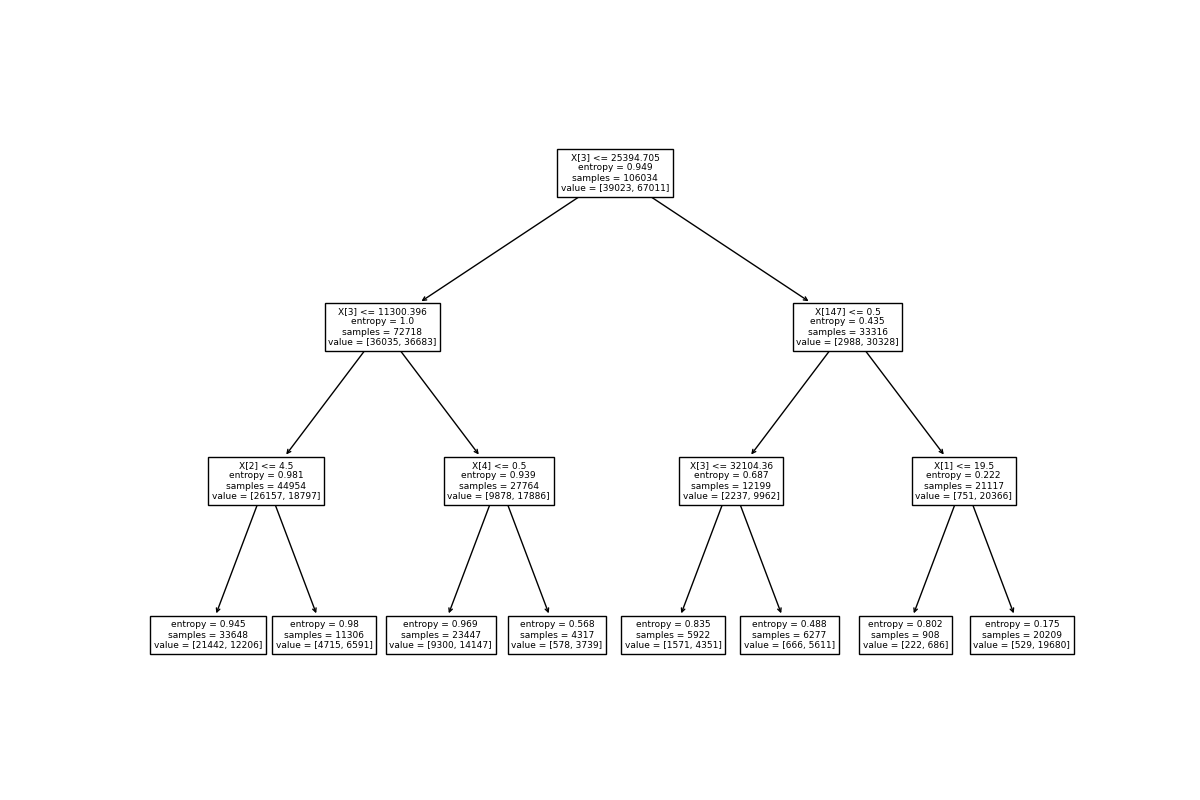

[Text(0.5, 0.875, 'X[3] <= 25394.705\nentropy = 0.949\nsamples = 106034\nvalue = [39023, 67011]'),
 Text(0.25, 0.625, 'X[3] <= 11300.396\nentropy = 1.0\nsamples = 72718\nvalue = [36035, 36683]'),
 Text(0.125, 0.375, 'X[2] <= 4.5\nentropy = 0.981\nsamples = 44954\nvalue = [26157, 18797]'),
 Text(0.0625, 0.125, 'entropy = 0.945\nsamples = 33648\nvalue = [21442, 12206]'),
 Text(0.1875, 0.125, 'entropy = 0.98\nsamples = 11306\nvalue = [4715, 6591]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\nentropy = 0.939\nsamples = 27764\nvalue = [9878, 17886]'),
 Text(0.3125, 0.125, 'entropy = 0.969\nsamples = 23447\nvalue = [9300, 14147]'),
 Text(0.4375, 0.125, 'entropy = 0.568\nsamples = 4317\nvalue = [578, 3739]'),
 Text(0.75, 0.625, 'X[147] <= 0.5\nentropy = 0.435\nsamples = 33316\nvalue = [2988, 30328]'),
 Text(0.625, 0.375, 'X[3] <= 32104.36\nentropy = 0.687\nsamples = 12199\nvalue = [2237, 9962]'),
 Text(0.5625, 0.125, 'entropy = 0.835\nsamples = 5922\nvalue = [1571, 4351]'),
 Text(0.6875, 0.125, 'entro

In [462]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [463]:
# Performance 
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_en.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58     16720
           1       0.75      0.82      0.78     28724

    accuracy                           0.72     45444
   macro avg       0.69      0.68      0.68     45444
weighted avg       0.71      0.72      0.71     45444



In [464]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 9068  7652]
 [ 5286 23438]]


<IPython.core.display.Javascript object>


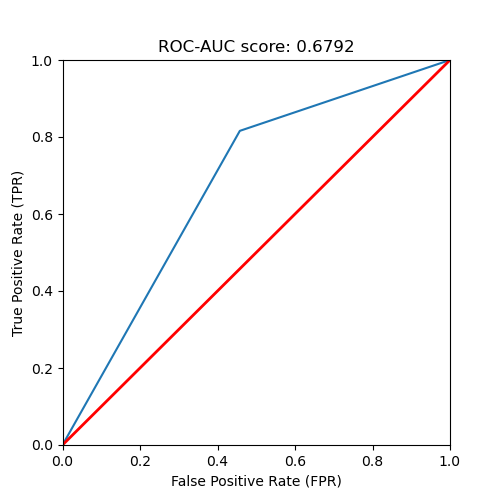

In [465]:
# ROC AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, classification_report, roc_curve
predictions = clf_en.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],  'r', linewidth=2)
plt.title(f'ROC-AUC score: {round(roc_auc_score(y_test, predictions), 4)}')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()